<a href="https://colab.research.google.com/github/yagnavalli/yagnavalli/blob/main/Sachin_Vs_Kohli_DS_by_Yagna_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Runs per innings(RPI) replacing average runs because: average doesn't call not out runs, which doesn't maintain consistency. 
#For more info:  https://www.espncricinfo.com/story/anantha-narayanan-uses-runs-per-test-to-show-consistency-of-batsmen-1020119

In [ ]:
import warnings 
warnings.filterwarnings('ignore') #to make it look clean, if the version is updated and some features are not similar it gives a warning, hence this.

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt


In [ ]:
df= pd.read_csv('/ODI_data.csv') #copied the path, takes max 3 mins to upload the csv file here. 
df

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,11-08-2019,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N Pooran,42,42,69,1.0,0.0,52,4,1,80.76,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SO Hetmyer,18,18,31,1.0,0.0,20,2,0,90,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RL Chase,18,18,34,1.0,0.0,23,0,0,78.26,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SS Cottrell,17,17,23,1.0,0.0,18,2,1,94.44,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171963,IR Redpath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,v England,Melbourne,05-01-1971,Australia,NaN,NaN,NaN,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-
171964,IM Chappell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,v England,Melbourne,05-01-1971,Australia,NaN,NaN,NaN,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-
171965,KD Walters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,v England,Melbourne,05-01-1971,Australia,NaN,NaN,NaN,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-
171966,RW Marsh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,v England,Melbourne,05-01-1971,Australia,NaN,NaN,NaN,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-


In [ ]:
len(df.columns), len(df)


(28, 171968)

In [ ]:
df['Innings Runs Scored Num'].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '-', nan, '40', '6', '4', '87', '54', '46',
       '30', '12', '69', '39', '14', '10', '9', '8', '7', '82', '52',
       '41', '15', '98', '43', '19', '111', '48', '36', '25', '67', '60',
       '84', '59', '55', '47', '85', '49', '45', '34', '29', '22', '74',
       '28', '77', '50', '32', '23', '35', '122', '100', '95', '103',
       '113', '53', '96', '27', '64', '58', '33', '31', '73', '56', '86',
       '62', '106', '24', '57', '104', '26', '66', '51', '118', '105',
       '101', '21', '79', '44', '102', '88', '80', '72', '97', '68', '89',
       '38', '83', '63', '148', '166', '90', '76', '37', '70', '124',
       '94', '140', '153', '107', '117', '121', '92', '78', '75', '114',
       '115', '130', '128', '151', '110', '138', '135', '109', '61',
       '179', '170', '112', '116', '91', '143', '93', '123', '145', '81',
       '150', '162', '108', '131', '133', '137', '146', '139', 

In [ ]:
#we see hyphen and 'nan', we have to clean the data.
df= df[df['Innings Runs Scored Num']!= '-']
df['Innings Runs Scored Num'].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', nan, '40', '6', '4', '87', '54', '46', '30',
       '12', '69', '39', '14', '10', '9', '8', '7', '82', '52', '41',
       '15', '98', '43', '19', '111', '48', '36', '25', '67', '60', '84',
       '59', '55', '47', '85', '49', '45', '34', '29', '22', '74', '28',
       '77', '50', '32', '23', '35', '122', '100', '95', '103', '113',
       '53', '96', '27', '64', '58', '33', '31', '73', '56', '86', '62',
       '106', '24', '57', '104', '26', '66', '51', '118', '105', '101',
       '21', '79', '44', '102', '88', '80', '72', '97', '68', '89', '38',
       '83', '63', '148', '166', '90', '76', '37', '70', '124', '94',
       '140', '153', '107', '117', '121', '92', '78', '75', '114', '115',
       '130', '128', '151', '110', '138', '135', '109', '61', '179',
       '170', '112', '116', '91', '143', '93', '123', '145', '81', '150',
       '162', '108', '131', '133', '137', '146', '139', '125'

In [ ]:
#df.dropna() drops all the values minus the column headings. 

In [ ]:
df= df.dropna(subset= ['Innings Runs Scored Num']) 



In [ ]:
df['Innings Runs Scored Num'].unique() #removed NaN

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '40', '6', '4', '87', '54', '46', '30', '12',
       '69', '39', '14', '10', '9', '8', '7', '82', '52', '41', '15',
       '98', '43', '19', '111', '48', '36', '25', '67', '60', '84', '59',
       '55', '47', '85', '49', '45', '34', '29', '22', '74', '28', '77',
       '50', '32', '23', '35', '122', '100', '95', '103', '113', '53',
       '96', '27', '64', '58', '33', '31', '73', '56', '86', '62', '106',
       '24', '57', '104', '26', '66', '51', '118', '105', '101', '21',
       '79', '44', '102', '88', '80', '72', '97', '68', '89', '38', '83',
       '63', '148', '166', '90', '76', '37', '70', '124', '94', '140',
       '153', '107', '117', '121', '92', '78', '75', '114', '115', '130',
       '128', '151', '110', '138', '135', '109', '61', '179', '170',
       '112', '116', '91', '143', '93', '123', '145', '81', '150', '162',
       '108', '131', '133', '137', '146', '139', '125', '12

In [ ]:
df.head(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,11-08-2019,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# we are looking at two diff gen batsmen (Kohli Vs Sachin), hence year we need to look out for.
#convert to datetime
df['Innings Date']= pd.to_datetime(df['Innings Date'])
df['year']= df['Innings Date'].dt.year #dt-datetime obj

In [ ]:
df.head(3) #to check the col headings

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,2019-11-08,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,N Pooran,42,42,69,1.0,0.0,52,4,1,80.76,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
2,SO Hetmyer,18,18,31,1.0,0.0,20,2,0,90,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [ ]:
df['Innings Runs Scored Num']= df['Innings Runs Scored Num'].astype('int')

In [ ]:
df['Innings Balls Faced']= df['Innings Balls Faced'].astype('int')

In [ ]:
df['Innings Not Out Flag']= df['Innings Not Out Flag'].astype('int')

In [ ]:
sachin_df= df[(df.year >=1994) & (df.year<=2004)] #filter this year
sachin_df.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
77610,V Sehwag,70,70,85,1.0,0,52,9,2,134.61,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77611,Yuvraj Singh,69,69,34,1.0,0,32,8,3,215.62,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77612,R Dravid,60,60,87,1.0,0,68,5,0,88.23,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77613,SC Ganguly,55,55,98,1.0,0,80,2,2,68.75,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77614,SR Tendulkar,47,47,60,1.0,0,42,9,0,111.9,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [ ]:
kohli_df= df[(df.year >=2009) & (df.year<=2019)]   #filter this year

In [ ]:
kohli_df.head(20) #check if the year is filtered

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
0,E Lewis,65,65,128,1.0,0,80,8,1,81.25,2,v India,Port of Spain,2019-11-08,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,N Pooran,42,42,69,1.0,0,52,4,1,80.76,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
2,SO Hetmyer,18,18,31,1.0,0,20,2,0,90,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
3,RL Chase,18,18,34,1.0,0,23,0,0,78.26,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
4,SS Cottrell,17,17,23,1.0,0,18,2,1,94.44,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
5,JO Holder,13*,13,38,1.0,1,19,0,0,68.42,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
6,CH Gayle,11,11,49,1.0,0,24,1,0,45.83,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
7,SD Hope,5,5,14,1.0,0,10,0,0,50,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
8,CR Brathwaite,0,0,5,1.0,0,3,0,0,0,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
9,KAJ Roach,0,0,5,1.0,0,3,0,0,0,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


**Parameters required**: 
1. Runs per innings(RPI)= Total runs/total innings
2. SR= (total runs/total balls)*100
3. 100's= sum(100's)
4. 50's= sum(50's)
5. Team's Contribution= (Player runs/team runs) 
   
   **Ex**: Virat runs 50, team runs= 150, contribution by Virat is 33.3%**



In [ ]:
#data types of each col heading
df.dtypes

Innings Player                           object
Innings Runs Scored                      object
Innings Runs Scored Num                   int64
Innings Minutes Batted                   object
Innings Batted Flag                     float64
Innings Not Out Flag                      int64
Innings Balls Faced                       int64
Innings Boundary Fours                   object
Innings Boundary Sixes                   object
Innings Batting Strike Rate              object
Innings Number                           object
Opposition                               object
Ground                                   object
Innings Date                     datetime64[ns]
Country                                  object
50's                                    float64
100's                                   float64
Innings Runs Scored Buckets              object
Innings Overs Bowled                     object
Innings Bowled Flag                     float64
Innings Maidens Bowled                  

We see that Innings Runs Scored Num is an object, so we have to convert to an int. 


In [ ]:
len(df.dtypes)

29

Q. What is the total runs scored by Sachin in these time frame?


In [ ]:
sdf= sachin_df[sachin_df['Innings Player'] == 'SR Tendulkar']
sdf.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
77614,SR Tendulkar,47,47,60,1.0,0,42,9,0,111.9,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77747,SR Tendulkar,19,19,46,1.0,0,32,3,0,59.37,1,v Bangladesh,Chattogram,2004-12-23,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
78054,SR Tendulkar,16,16,30,1.0,0,17,2,0,94.11,1,v Pakistan,Kolkata,2004-11-13,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
79590,SR Tendulkar,74,74,170,1.0,0,100,7,1,74,2,v Sri Lanka,Colombo (RPS),2004-01-08,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
79681,SR Tendulkar,18,18,30,1.0,0,21,3,0,85.71,1,v Sri Lanka,Colombo (RPS),2004-07-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [ ]:
#answer to Q1-->
sum(sdf['Innings Runs Scored Num'])

11818

In [ ]:
#Kohli 
kdf= kohli_df[kohli_df['Innings Player'] == 'V Kohli']
kdf.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
11,V Kohli,120,120,179,1.0,0,125,14,1,96,1,v West Indies,Port of Spain,2019-11-08,India,0.0,1.0,100-149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
327,V Kohli,1,1,8,1.0,0,6,0,0,16.66,2,v New Zealand,Manchester,2019-09-07,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
420,V Kohli,34*,34,61,1.0,1,41,3,0,82.92,2,v Sri Lanka,Leeds,2019-06-07,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
664,V Kohli,26,26,45,1.0,0,27,3,0,96.29,1,v Bangladesh,Birmingham,2019-02-07,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
804,V Kohli,66,66,103,1.0,0,76,7,0,86.84,2,v England,Birmingham,2019-06-30,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [ ]:
sum(kdf['Innings Runs Scored Num'])

11247

In [ ]:
len(sdf), len(kdf) #no. of matches

(271, 224)

In [ ]:
#RPI:

sum(sdf['Innings Runs Scored Num'])/len(sdf), sum(kdf['Innings Runs Scored Num'])/len(kdf)

(43.608856088560884, 50.20982142857143)

In [ ]:
#SR:
(sum(sdf['Innings Runs Scored Num'])/sum(sdf['Innings Balls Faced']))*100, (sum(kdf['Innings Runs Scored Num'])/sum(kdf['Innings Balls Faced']))*100

(88.21377920429947, 93.56126778138258)

In [ ]:
sum(sdf["100's"]), sum(kdf["100's"])


(37.0, 42.0)

In [ ]:
sum(sdf["50's"]), sum(kdf["50's"])

(57.0, 53.0)

In [ ]:
#TEAM CONTRI
sum(sdf['Innings Runs Scored Num'])/sum(sachin_df[sachin_df.Country== 'India']['Innings Runs Scored Num']), sum(kdf['Innings Runs Scored Num'])/sum(kohli_df[kohli_df.Country== 'India']['Innings Runs Scored Num']) #total runs by players, now we have to find total runs by a team.


(0.16951875493078963, 0.17610033350556625)

VISUALIZATIONS:


In [ ]:
sachin_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending=False).head(10) #grouping the sum of each player's total runs and sorting in descending order as sort order by default is ascending, and if I want top 10, then head(10)

Innings Player
SR Tendulkar      11818
SC Ganguly         9911
ST Jayasuriya      9297
Inzamam-ul-Haq     8561
R Dravid           7751
RT Ponting         7422
Saeed Anwar        7320
JH Kallis          7267
MS Atapattu        7253
MG Bevan           6912
Name: Innings Runs Scored Num, dtype: int64

Now visualizing:


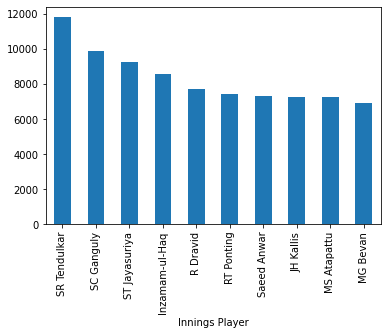

In [ ]:
sachin_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending=False).head(10).plot(kind="bar")
plt.show() #if horizontal then= bar

In [ ]:
kohli_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending=False).head(10)


Innings Player
V Kohli           11247
RG Sharma          8083
HM Amla            7745
TM Dilshan         7296
KC Sangakkara      7275
AB de Villiers     7247
LRPL Taylor        7059
MS Dhoni           6838
EJG Morgan         6748
MJ Guptill         6626
Name: Innings Runs Scored Num, dtype: int64

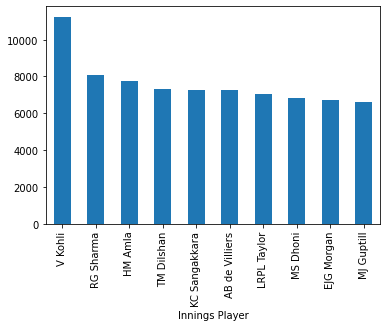

In [ ]:
kohli_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending=False).head(10).plot(kind="bar")
plt.show() #if horizontal then= barh

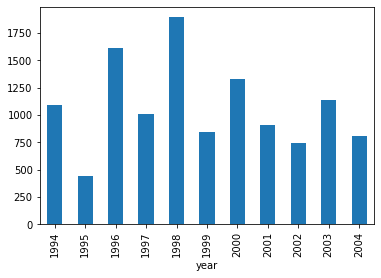

In [ ]:
sdf.groupby(['year'])['Innings Runs Scored Num'].sum().plot(kind='bar')
plt.show()

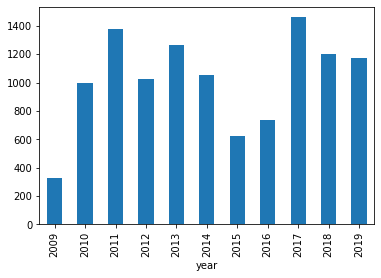

In [ ]:
kdf.groupby(['year'])['Innings Runs Scored Num'].sum().plot(kind='bar')
plt.show()

In [ ]:

#kohli 2017, sachin 1998 highest runs
#kohli 2009, sachin 1995 lowest 

**NORMALIZATION:**


In [ ]:
#RPI
sum(sdf['Innings Runs Scored Num'])/len(sdf), sum(kdf['Innings Runs Scored Num'])/len(kdf)

(43.608856088560884, 50.20982142857143)

In [ ]:
sum(kohli_df['Innings Runs Scored Num'])/len(kohli_df)

24.99673202614379

In [ ]:
no_kohli=kohli_df[kohli_df['Innings Player']!= 'V Kohli']

In [ ]:
sum(no_kohli['Innings Runs Scored Num'])/len(no_kohli) 

24.737756786500366

Now we can see that average runs by Kohli= 50 
Avg runs=25(24.7...)

In [ ]:
no_sach=sachin_df[sachin_df['Innings Player']!= 'SR Tendulkar']

In [ ]:
sum(no_sach['Innings Runs Scored Num'])/len(no_sach) 

22.43512946754194

In [ ]:
(sum(kdf['Innings Runs Scored Num'])/len(kdf))/(sum(no_kohli['Innings Runs Scored Num'])/len(no_kohli))

2.029683688052565

In [ ]:
(sum(sdf['Innings Runs Scored Num'])/len(sdf))/(sum(no_sach['Innings Runs Scored Num'])/len(no_sach))

1.9437755485945407

In [ ]:
# kohli => other
# SR = V = 93, Other = 80, V/other, S/others
# 100s - Number of matches to score a 100
# 50s - Number of matches to score a 50
# Team contribution - V_contri/O_contri

**Strike Rate**:

In [ ]:
# sr of sachin
sum(sdf['Innings Runs Scored Num'])/sum(sdf['Innings Balls Faced'])

0.8821377920429947

In [ ]:
# sr of sachin's peers
sum(no_sach['Innings Runs Scored Num'])/sum(no_sach['Innings Balls Faced'])

0.7233808936558636

In [ ]:
# sr of kohli
sum(kdf['Innings Runs Scored Num'])/sum(kdf['Innings Balls Faced'])

0.9356126778138258

In [ ]:
# sr of kohli's peers
sum(no_kohli['Innings Runs Scored Num'])/sum(no_kohli['Innings Balls Faced'])

0.8342743413330611

In [ ]:
# normalized sachin's value
sachin_sr = sum(sdf['Innings Runs Scored Num'])/sum(sdf['Innings Balls Faced'])
sachin_peer_sr = sum(no_sach['Innings Runs Scored Num'])/sum(no_sach['Innings Balls Faced'])
sachin_sr/sachin_peer_sr

1.2194651528391862

In [ ]:
# normalized kohli's value
kohli_sr = sum(kdf['Innings Runs Scored Num'])/sum(kdf['Innings Balls Faced'])
kohli_peer_sr = sum(no_kohli['Innings Runs Scored Num'])/sum(no_kohli['Innings Balls Faced'])
kohli_sr/kohli_peer_sr

1.121468839996732

**100's: Number of matches to score a 100**

In [ ]:
# sachin matches per 100
len(sdf)/sum(sdf["100's"])

7.324324324324325

In [ ]:
# sachin peers - matches per 100
len(no_sach)/sum(no_sach["100's"])

47.377969762419006

In [ ]:
# kohli matches per 100
len(kdf)/sum(kdf["100's"])

5.333333333333333

In [ ]:
# kohli peers - matches per 100
len(no_kohli)/sum(no_kohli["100's"])

29.311827956989248

In [ ]:
# normalized sachin value
sachin_mper_100 = len(sdf)/sum(sdf["100's"])
sachin_peers_mper_100 = len(no_sach)/sum(no_sach["100's"])
sachin_mper_100/sachin_peers_mper_100

0.15459346107595562

In [ ]:
# normalized virat value
kohli_mper_100 = len(kdf)/sum(kdf["100's"])
kohli_peers_mper_100 = len(no_kohli)/sum(no_kohli["100's"])
kohli_mper_100/kohli_peers_mper_100

0.18195157740278795

**50's: Number of matches to score a 50**

In [ ]:
# sachin matches per 100
len(sdf)/sum(sdf["50's"])

4.754385964912281

In [ ]:
# sachin peers - matches per 100
len(no_sach)/sum(no_sach["50's"])

8.33751425313569

In [ ]:
# kohli matches per 100
len(kdf)/sum(kdf["50's"])

4.226415094339623

In [ ]:
# kohli peers - matches per 100
len(no_kohli)/sum(no_kohli["50's"])

7.673469387755102

In [ ]:
# normalized sachin value
sachin_mper_50 = len(sdf)/sum(sdf["50's"])
sachin_peers_mper_50 = len(no_sach)/sum(no_sach["50's"])
sachin_mper_50/sachin_peers_mper_50

0.5702402203539483

In [ ]:
# normalized virat value
kohli_mper_50 = len(kdf)/sum(kdf["50's"])
kohli_peers_mper_50 = len(no_kohli)/sum(no_kohli["50's"])
kohli_mper_50/kohli_peers_mper_50

0.5507828181453231

**Team Contribution**: *Here we are already comparing with peers, hence no need of a normalization*

In [ ]:
# % of team runs by sachin
100*sum(sdf['Innings Runs Scored Num'])/(sum(no_sach[no_sach.Country == 'India']['Innings Runs Scored Num'])+sum(sdf['Innings Runs Scored Num']))

16.951875493078965

In [ ]:
# % of team runs by kohli
100*sum(kdf['Innings Runs Scored Num'])/(sum(no_kohli[no_kohli.Country == 'India']['Innings Runs Scored Num'])+sum(kdf['Innings Runs Scored Num']))

17.610033350556627

## **WOOHOO KOHLI is the WINNER.**


